<div class="container" style="display:flex; width:100%;height:150px;background-color:None;">
    <div class="subcontainer-1" style="flex:0.11;height:100%;width:20%;">
        <div class="logo-frame" style="height:100%;background-color:None;">
            <img src="https://github.com/andikaaa18/SkillAcademy_Project/blob/main/skill_academy_logo.jpg?raw=true" style="height:100%;float:left; filter:invert(0%);">
        </div>
    </div>
    <div class="subcontainer-2" style="flex:0.89;height:60%;margin-top:2.5%">
        <div class="upper-sidebar" style="height:50%;width:100%;background-color:None;align-items:center;display:inline-flex;">
            <div style="font-size:50px; font-family:Trebuchet MS; font-weight:bold; text-align:left">
            Skill Academy Project
            </div>
        </div>
        <div class="lower-sidebar" style="height:50%;width:100%;background-color:None;align-items:center;display: inline-flex;">
            <div style="font-size:30px; font-family:Trebuchet MS;">
            &mdash; Final Project : Stock Price Forecasting
            </div>
        </div>
    </div>
</div>

<hr style="width:95%;height:2px;background-color:black;" align="left">

<div style="font-family:Trebuchet MS; font-weight:bold; font-size:45px; text-align:left; line-height:50px">
A Comprehensive Analysis for UNTR Stock Predictions with LSTM Neural Networks
</div>

&mdash; Membangun model yang dapat melakukan *forecasting* harga saham untuk beberapa hari ke depan.

# **A. Pendahuluan**

## 1) Deskripsi Proyek

<div style="font-family:Trebuchet MS; font-weight:bold; font-size:25px; padding-bottom:20px">Memprediksi harga saham UNTR untuk keperluan <i>swing trading</i></div>

<div style="margin-left:2%; width:95%; text-align:justify">

*Swing trading* merupakan salah satu strategi jual-beli di bursa saham, dimana seorang *trader* akan menahan saham yang sudah dibeli selama satu hari atau lebih dalam upaya mendapatkan keuntungan dari perubahan harga. Seorang *swing trader* akan  lebih lama berada pada posisi *swing  trading* dibandingkan posisi *day trading* tetapi akan lebih pendek  dibandingkan strategi *investing*.

Saham UNTR (United Tractor) merupakan saham yang sering digunakan oleh *swing trader* dalam melakukan aktivitas jual-beli. Kondisi fundamental perusahaan yang baik serta likuiditas yang tinggi akan membuat resiko kerugian lebih kecil. Harga saham relatif stabil dalam jangka waktu panjang, tetapi memiliki volatilitas harga setiap harinya yang dapat dimanfaatkan untuk memaksimalkan profit oleh *trader*.

Oleh karena itu, untuk membantu *swing trader* dalam membuat keputusan *trading* maka diperlukan suatu *tools* yang dapat memberikan proyeksi harga saham UNTR untuk beberapa hari ke depan.
</div>

## 2) Tujuan dan Alur Proses

<div style="font-family:Trebuchet MS; font-size:25px; padding-bottom:20px; font-weight:bold">TUJUAN</div>
<div style="margin-left:2%; width:95%; text-align:justify">

Tujuan yang ingin dicapai pada proyek ini adalah dapat menghasilkan model yang mampu memprediksi harga saham untuk komponen harga pembukaan, penutupan, harga tertinggi dan harga terendah secara akurat. Adapun target capaian minimum yang harus dipenuhi dalam proyek ini adalah dapat menghasilkan model dengan skor MAPE (*mean absolute percentage error*) tidak lebih dari tingkat volatilitas saham UNTR.
</div>

<div style="font-family:Trebuchet MS; font-size:25px; padding-bottom:20px; font-weight:bold">ALUR PROYEK</div>
<div style="margin-left:2%; width:95%;text-align:justify">

Adapun proses yang akan dilakukan dalam proses analis untuk proyek ini terdiri dari beberapa langkah utama, yaitu:
1. **Ikhtisar Data.** <div> Pada bagian ini, data yang telah diimpor akan dipahami setiap parameter data serta sejumlah catatan dokumentasi terkait dataset.</div>        
2. **Mempersiapkan Data.** <div> Pada bagian ini, data yang telah diimpor akan dilakukan proses eksplorasi untuk melihat berbagai permasalahan pada data kemudian dilanjutkan dengan perbaikan data. Apabila diperlukan, reduksi dan pengayaan data akan dilakukan untuk membuang informasi yang tidak relevan dan memperkaya informasi pada dataset. Hasil akhir dari proses ini yaitu dataset yang siap untuk dilakukan proses analisis.</div>        
3. **Analisa Data Eksploratif.** <div> Pada bagian ini, data yang telah dipersiapkan akan dilakukan sejumlah perhitungan statistik deskriptif dan menampilkan sejumlah visualisasi data untuk melihat pola-pola tertentu.</div>
4. **Membangun Model *Machine-learning*.** <div> Pada tahap ini akan dilakukan sejumlah *feature engineering*, persiapan arsitektur model, pelatihan model dan evaluasi model. </div>
5. **Membuat *user interface* untuk model** <div> Bagian ini akan dilakukan pada notebook yang berbeda</div>

</div>

# **B. Memuat Data**

* Memuat sejumlah *library* dan data yang dibutuhkan.

In [32]:
# library for data processing
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# library for data visualization
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe

# library for building models
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader


# other
import joblib
import time
import datetime
import gradio as gr

In [2]:
# memuat dataset
try:
    raw_df = pd.read_csv("datasets/UNTR.csv", parse_dates=['Date'], index_col='Date')
    
except:
    raw_df = pd.read_csv("/datasets/UNTR.csv", parse_dates=['Date'], index_col='Date')

# **C. Ikhtisar Data**

Berikut di bawah ini ditampilkan 10 baris data pada dataset yang akan dianalisis.

In [3]:
# display observations
print(f"Ukuran dataset                           : {raw_df.shape}")
print(f"Apakah DatetimeIndex dalam urutan naik?  : {raw_df.index.is_monotonic_increasing}")
print(f"Interval pengambilan data  per observasi : {raw_df.index.diff().dropna().unique().to_list()}")
print(f"Periode pengamatan                       : {raw_df.index.min()} s/d {raw_df.index.max()}\n")
print(raw_df.head(5), '\n')
print(raw_df.tail(5))

Ukuran dataset                           : (1995, 6)
Apakah DatetimeIndex dalam urutan naik?  : True
Interval pengambilan data  per observasi : [Timedelta('1 days 00:00:00'), Timedelta('3 days 00:00:00'), Timedelta('4 days 00:00:00'), Timedelta('2 days 00:00:00'), Timedelta('5 days 00:00:00'), Timedelta('10 days 00:00:00'), Timedelta('6 days 00:00:00'), Timedelta('11 days 00:00:00'), Timedelta('8 days 00:00:00')]
Periode pengamatan                       : 2016-01-19 00:00:00 s/d 2024-01-18 00:00:00

               Open     High      Low    Close    Adj Close     Volume
Date                                                                  
2016-01-19  16000.0  16100.0  15800.0  16075.0  9445.107422  2482800.0
2016-01-20  16000.0  16100.0  15875.0  16025.0  9415.728516  4175400.0
2016-01-21  15925.0  16125.0  15625.0  15825.0  9298.216797  4104900.0
2016-01-22  16050.0  16325.0  15950.0  16325.0  9591.998047  2270800.0
2016-01-25  16650.0  17050.0  16525.0  16925.0  9944.539063  3907800.

Data di atas merupakan informasi historis harga saham UNTR pada periode 19 Januari 2016 hingga  18 Januari 2024. Data saat ini telah tersusun dalam urutan naik (berdasarkan *DatetimeIndex*) dan memiliki sebanyak 1995 observasi. Pada **Interval pengambilan data  per observasi**, terlihat bahwa interval tidak hanya 1 hari tetapi ada yang 2 hari, 3 hari, hingga 11 hari. Hal ini kemungkinan berkaitan dengan hari libur bursa saham.

Berikut di bawah ini merupakan deskripsi dari masing-masing kolom berdasarkan dokumentasi pada dataset.

* `Open`  — Harga pembukaan saham pada hari tertentu.
* `High`  — Harga tertinggi saham pada hari tertentu.
* `Low`  — Harga terendah saham pada hari tertentu.
* `Close`  — Harga penutupan saham pada hari tertentu (telah disesuaikan dengan *stock splits*).
* `Adj Close`  — Harga penutupan saham pada hari tertentu (telah disesuaikan dengan *stock splits* dan *dividend*).
* `Volume` — Jumlah lembar saham yang  ditransaksikan pada  hari tertentu.


# **D. Mempersiapkan Data**

## 1) Eksplorasi Data

Berikut di bawah ini merupakan informasi umum dataset.

In [4]:
# general information of the dataset
print(f"Apakah DatetimeIndex dalam urutan naik?  : {raw_df.index.is_monotonic_increasing}")
print(f"Interval pengambilan data  per observasi : {raw_df.index.diff().dropna().unique().to_list()}\n")
raw_df.info()

Apakah DatetimeIndex dalam urutan naik?  : True
Interval pengambilan data  per observasi : [Timedelta('1 days 00:00:00'), Timedelta('3 days 00:00:00'), Timedelta('4 days 00:00:00'), Timedelta('2 days 00:00:00'), Timedelta('5 days 00:00:00'), Timedelta('10 days 00:00:00'), Timedelta('6 days 00:00:00'), Timedelta('11 days 00:00:00'), Timedelta('8 days 00:00:00')]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1995 entries, 2016-01-19 to 2024-01-18
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1994 non-null   float64
 1   High       1994 non-null   float64
 2   Low        1994 non-null   float64
 3   Close      1994 non-null   float64
 4   Adj Close  1994 non-null   float64
 5   Volume     1994 non-null   float64
dtypes: float64(6)
memory usage: 109.1 KB


Dari hasil di atas, berikut informasi yang diperoleh.
* Dataset tidak mengandung *missing value*.
* Tidak terdapat kesalahan penggunaan tipe data.
* Tidak terdapat duplikat pada dataset karena telah menggunakan *DatetimeIndex*.
* Frekuensi pengamatan setiap observasi (Interval pengambilan data  per observasi) tidak bersifat unik. Terdapat interval 1 hari, 3 hari hingga 11 hari dikarenakan hari libur bursa. Akan tetapi hal ini tidak menjadi masalah dan dapat diabaikan.

## 2) Pengayaan Data

Dataset yang kita miliki saat ini hanya memiliki informasi terkait harga dan volume transaksi saham. Oleh karena itu perlu dilakukan penambahan fitur agar informasi yang akan dimuat ke dalam model *machine learning* menjadi lebih kemprehensif. Berikut adalah fitur-fitur yang akan ditambahakan:
1. **Fitur *lag***

Berikut di bawah ini merupakan *function* yang berfungsi untuk menambahkan fitur pada dataset.

In [8]:
def make_features(data:pd.DataFrame, lag:list[int]=None):
    # time-based features
    df = data.copy()
    # df['day'] = df.index.day
    # df['dayofweek'] = df.index.dayofweek
    # df['month'] = df.index.month
    
    # lag features
    if lag: # will be executed if the variable has a value
        for i in lag:
            df[f"Open(t-{i})"] = df['Open'].shift(i)
            df[f"High(t-{i})"] = df['High'].shift(i)
            df[f"Low(t-{i})"] = df['Low'].shift(i)
            df[f"Close(t-{i})"] = df['Close'].shift(i)
    
    return df.dropna()

In [9]:
# menambahkan fitur
new_df = make_features(raw_df, list(range(1,8)))

print(new_df.columns)
new_df.head()

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Open(t-1)',
       'High(t-1)', 'Low(t-1)', 'Close(t-1)', 'Open(t-2)', 'High(t-2)',
       'Low(t-2)', 'Close(t-2)', 'Open(t-3)', 'High(t-3)', 'Low(t-3)',
       'Close(t-3)', 'Open(t-4)', 'High(t-4)', 'Low(t-4)', 'Close(t-4)',
       'Open(t-5)', 'High(t-5)', 'Low(t-5)', 'Close(t-5)', 'Open(t-6)',
       'High(t-6)', 'Low(t-6)', 'Close(t-6)', 'Open(t-7)', 'High(t-7)',
       'Low(t-7)', 'Close(t-7)'],
      dtype='object')


,Open,High,Low,Close,Adj Close,Volume,Open(t-1),High(t-1),Low(t-1),Close(t-1),...,Low(t-5),Close(t-5),Open(t-6),High(t-6),Low(t-6),Close(t-6),Open(t-7),High(t-7),Low(t-7),Close(t-7)
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-28,16800.0,17250.0,16725.0,16775.0,9856.403320,3016500.0,16750.0,17225.0,16725.0,16800.0,...,15625.0,15825.0,16000.0,16100.0,15875.0,16025.0,16000.0,16100.0,15800.0,16075.0
2016-01-29,16875.0,17450.0,16775.0,17400.0,10223.630859,5968200.0,16800.0,17250.0,16725.0,16775.0,...,15950.0,16325.0,15925.0,16125.0,15625.0,15825.0,16000.0,16100.0,15875.0,16025.0
2016-02-01,17400.0,17475.0,17250.0,17475.0,10267.699219,2674200.0,16875.0,17450.0,16775.0,17400.0,...,16525.0,16925.0,16050.0,16325.0,15950.0,16325.0,15925.0,16125.0,15625.0,15825.0
2016-02-02,17200.0,17475.0,16600.0,16600.0,9753.578125,2819500.0,17400.0,17475.0,17250.0,17475.0,...,16475.0,16500.0,16650.0,17050.0,16525.0,16925.0,16050.0,16325.0,15950.0,16325.0
2016-02-03,16500.0,16825.0,16425.0,16475.0,9680.133789,1694200.0,17200.0,17475.0,16600.0,16600.0,...,16725.0,16800.0,16650.0,16875.0,16475.0,16500.0,16650.0,17050.0,16525.0,16925.0


## 3) Reduksi Data

Pada proyek ini, kita tidak akan menggunakan fitur volume transaksi dan *adjusted close*, sehingga kedua kolom akan dibuang dari dataset.

In [10]:
def remove_unimportant_features(data:pd.DataFrame):
    
    return data.drop(columns=["Volume", "Adj Close"])

new_df = remove_unimportant_features(new_df)

print(new_df.columns)    

Index(['Open', 'High', 'Low', 'Close', 'Open(t-1)', 'High(t-1)', 'Low(t-1)',
       'Close(t-1)', 'Open(t-2)', 'High(t-2)', 'Low(t-2)', 'Close(t-2)',
       'Open(t-3)', 'High(t-3)', 'Low(t-3)', 'Close(t-3)', 'Open(t-4)',
       'High(t-4)', 'Low(t-4)', 'Close(t-4)', 'Open(t-5)', 'High(t-5)',
       'Low(t-5)', 'Close(t-5)', 'Open(t-6)', 'High(t-6)', 'Low(t-6)',
       'Close(t-6)', 'Open(t-7)', 'High(t-7)', 'Low(t-7)', 'Close(t-7)'],
      dtype='object')


# **E. Analisa Data Eksploratif (EDA)**

> *Function* untuk visualisasi distribusi data menggunakan boxplot dan histogram

In [11]:
def box_hist_plot(df:pd.DataFrame, column:str, size:tuple, width:int, title:str, y_title, xlabel:str, 
                  rot:int=None, l_ylim=None, r_ylim=None, l_xlim=None, r_xlim=None, discrete=False, kde=True):
    
    fig, ax1 = plt.subplots(ncols=2, nrows=1, figsize=size)
    sns.boxplot(ax=ax1[0],data=df, x=column, color='#2A9D8F',
                showmeans=True, meanprops={"marker":"d","markerfacecolor":"white",
                                                    "markeredgecolor":"black","markersize":"6"})
    sns.histplot(ax=ax1[1], data=df, x=column, binwidth=width, kde=kde, color='#2A9D8F', discrete=discrete)
    fig.suptitle(title, size=15, y=y_title)

    # value boxplot
    q1 = df[column].quantile(0.25)
    q2 = df[column].quantile(0.5)
    q3 = df[column].quantile(0.75)
    minimum = df[column].min()
    maximum = df[column].max()
    iqr = q3-q1
    
    if q3+1.5*iqr<=maximum:
        top_whis = q3+1.5*iqr
    else:
        top_whis = maximum
    
    if q1-1.5*iqr>=minimum:
        bottom_whis = q1-1.5*iqr
    else:
        bottom_whis = minimum
    y_position = -0.45

    ax1[0].text(q1, y_position, np.round(q1, 2), ha='center', va='center', c='#2A9D8F', weight='bold', size=12,
            path_effects=[pe.withStroke(linewidth=2, foreground='white')], rotation=rot)
    ax1[0].text(q2, y_position, np.round(q2, 2), ha='center', va='center', c='#2A9D8F', weight='bold', size=12,
            path_effects=[pe.withStroke(linewidth=2, foreground='white')], rotation=rot)
    ax1[0].text(q3, y_position, np.round(q3, 2), ha='center', va='center', c='#2A9D8F', weight='bold', size=12,
            path_effects=[pe.withStroke(linewidth=2, foreground='white')], rotation=rot)
    ax1[0].text(top_whis, y_position, np.round(top_whis, 2), ha='center', va='center', c='#2A9D8F', weight='bold', size=12,
            path_effects=[pe.withStroke(linewidth=2, foreground='white')], rotation=rot)
    if bottom_whis>0:
        ax1[0].text(bottom_whis, y_position, np.round(bottom_whis, 2), ha='center', va='center', c='#2A9D8F', weight='bold', size=12,
                path_effects=[pe.withStroke(linewidth=2, foreground='white')], rotation=rot)
    else:
        pass

    ax1[0].grid(alpha=0.8, linestyle='dashed')
    ax1[1].grid(alpha=0.8, linestyle='dashed')
    
    ax1[0].set_xlabel(xlabel, size=12)
    ax1[1].set_xlabel(xlabel, size=12)
    
    ax1[0].set_ylim(l_ylim)
    ax1[1].set_ylim(r_ylim)
    ax1[0].set_xlim(l_xlim)
    ax1[1].set_xlim(r_xlim)
    
    plt.show()

## 1) Bagaimana tren harga saham UNTR

Berikut di bawah ini ditampilkan *candlestick chart* untuk saham UNTR selama Januari 2016 hingga Januari 2024.

In [12]:
# Menampilkan candlestick chart

fig = go.Figure(data=[go.Candlestick(
    x=new_df.index,
    open=new_df['Open'],
    high=new_df['High'],
    low=new_df['Low'],
    close=new_df['Close']
)])

fig.update_layout(
    title='UNTR Stock Price',
    yaxis_title = 'Price (Rp)',
    xaxis_title = 'Date',
)

fig.show()

<div style="font-size:25px; font-weight:bold; font-family:Trebuchet MS">Insights</div>
<div style="margin-left:1%; margin-top:1%; width:97%; text-align:justify">

* Saham UNTR tergolong saham siklikal. Terlihat secara jelas siklus 5 tahunan pada saham ini.
* Secara tren, harga saham ini tergolong stagnan tetapi kesempatan dari saham siklikal ini sangat bagus untuk diperoleh.

</div>

## 2) Bagaimana tingkat volatilitas saham UNTR

C:\Users\andik\AppData\Local\Temp\ipykernel_10704\942282056.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Rata-rata volatilitas per hari   : -0.09%
St. Deviasi volatilitas per hari : 2.16%


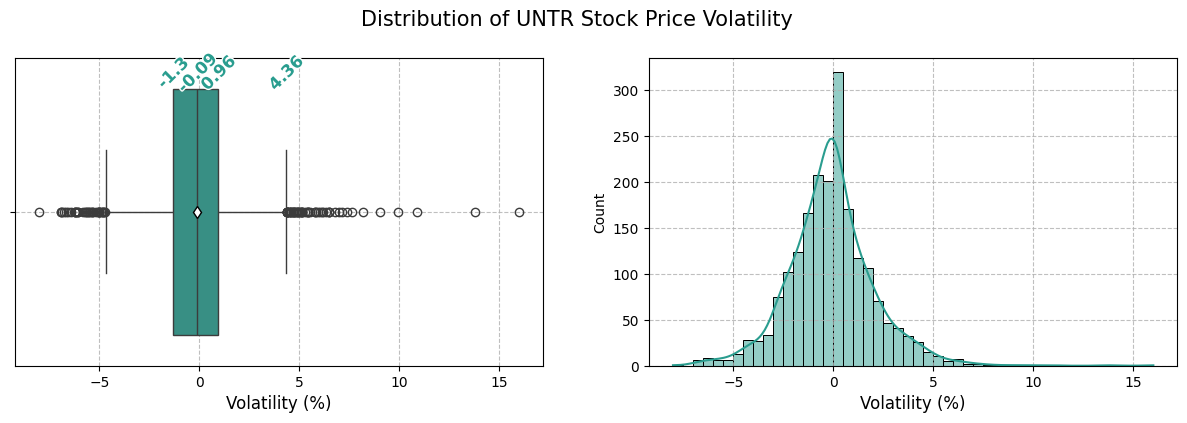

In [13]:
# stock_volatility = new_df.query("is_holiday==0")[["Close", "Open"]]
stock_volatility = new_df[["Close", "Open"]]
stock_volatility["value_change_percentage"] = ((stock_volatility["Close"]/stock_volatility["Open"]) - 1)*100

mean_volatility = stock_volatility["value_change_percentage"].values.mean()
std_volatility = stock_volatility["value_change_percentage"].values.std()

print(f"Rata-rata volatilitas per hari   : {mean_volatility:.2f}%")
print(f"St. Deviasi volatilitas per hari : {std_volatility:.2f}%")

# histogram chart
box_hist_plot(stock_volatility, column="value_change_percentage", size=(15,4), width=0.5, rot=45,
              title="Distribution of UNTR Stock Price Volatility", y_title=1, xlabel="Volatility (%)")

In [14]:
import scipy.stats as st

st.norm(mean_volatility, std_volatility).interval(0.95)

(-4.328042238513862, 4.145362283112676)

<div style="font-size:25px; font-weight:bold; font-family:Trebuchet MS">Insights</div>
<div style="margin-left:1%; margin-top:1%; width:97%; text-align:justify">

* Secara statistik, volatilitas harga saham UNTR berkisar pada -4% hingga 4%. Hal ini akan menjadi acuan sebagai batas skor MAPE pada model yang akan dilatih.
</div>

# **F. Membangun Model *Machine-learning***

## 1) *Features Engineering*

Berikut di bawah ini akan dilakukan pemisahan antara *features* dan *targets* serta melakukan pembagian data menjadi 3 bagian, yakni *training set*, *validation set* dan *testing set* dengan komposisi 70:15:15.

In [15]:
# memisahkan targets dan features
targets_cols = ['Open', 'High', 'Low', 'Close']
# targets_cols = ['Close']
features_cols = new_df.columns.drop(targets_cols).to_list()

x = new_df[features_cols]
y = new_df[targets_cols]

# melakukan data split
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.30, shuffle=False)
x_val, x_test, y_val, y_test = train_test_split(x_val, y_val, test_size=0.50, shuffle=False)

print(f"Training set size (x/y)  : {x_train.shape}/{y_train.shape}")
print(f"Validation set size (x/y): {x_val.shape}/{y_val.shape}")
print(f"Testing set size (x/y)   : {x_test.shape}/{y_test.shape}")


Training set size (x/y)  : (1386, 28)/(1386, 4)
Validation set size (x/y): (297, 28)/(297, 4)
Testing set size (x/y)   : (297, 28)/(297, 4)


Berikut di bawah ini akan dilakukan *scaling* data numerik pada fitur.

In [16]:
# melakukan scaling fitur
scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_val = scaler.transform(x_val)
x_test = scaler.transform(x_test)


Untuk menyesuaikan dengan format input dan output model, maka kita perlu melakukan transformasi dimensi data fitur dan target.

In [17]:
# melakukan transformasi dimensi matriks
x_train = x_train.reshape((-1, x_train.shape[1], 1))
x_val = x_val.reshape((-1, x_val.shape[1], 1))
x_test = x_test.reshape((-1, x_test.shape[1], 1))

y_train = y_train.values.reshape((-1, y_train.shape[1]))
y_val = y_val.values.reshape((-1, y_val.shape[1]))
y_test = y_test.values.reshape((-1, y_test.shape[1]))

print(f"Training set size (x/y)  : {x_train.shape}/{y_train.shape}")
print(f"Validation set size (x/y): {x_val.shape}/{y_val.shape}")
print(f"Testing set size (x/y)   : {x_test.shape}/{y_test.shape}")

Training set size (x/y)  : (1386, 28, 1)/(1386, 4)
Validation set size (x/y): (297, 28, 1)/(297, 4)
Testing set size (x/y)   : (297, 28, 1)/(297, 4)


Berikut di bawah ini, dataset akan dibuat menjadi objek *Dataset* agar dapat dilakukan pengambilan *batch* dengan ukuran tertentu.

In [18]:
# membuat dataset menjadi objek Dataset
class TimeSeriesDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float)
        self.y = torch.tensor(y, dtype=torch.float)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, i):
        return self.X[i], self.y[i]
   
train_dataset = TimeSeriesDataset(x_train, y_train)
val_dataset = TimeSeriesDataset(x_val, y_val)
test_dataset = TimeSeriesDataset(x_test, y_test)

In [19]:
# mengatur pengambilan batch
batch_size = 16

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

print(f"16 batch pertama untuk x_train dan y_train: "
      f"{list(train_loader)[0][0].shape, list(train_loader)[0][1].shape}")


16 batch pertama untuk x_train dan y_train: (torch.Size([16, 28, 1]), torch.Size([16, 4]))


## 2) Membangun Model

Berikut di bawah ini, kita akan membuat arsitektur model LSTM untuk memprediksi harga saham. Berikut merupakan diagram untuk arsitektur model LSTM yang akan dibangun.

<img src="Gambaran_Arsitektur.jpg" height="350px">

In [20]:
# membuat arsitektur model

class LSTMmodel(nn.Module):
    def __init__(self, n_input, num_stacked_layers, hidden_size, n_output,hidd_layers:tuple[int]=None, dtype=torch.float):
        super().__init__()
        self.num_stacked_layers = num_stacked_layers
        self.hidden_size = hidden_size
        
        # membuat LSTM cell
        self.lstm = nn.LSTM(input_size=n_input,
                            hidden_size=hidden_size, 
                            num_layers=num_stacked_layers, 
                            dtype=dtype,
                            batch_first=True)
        
        # membuat fully connected layers
        if hidd_layers:
            # input layer
            self.fc = torch.nn.ModuleList([torch.nn.Linear(hidden_size, hidd_layers[0], dtype=dtype), torch.nn.Tanh()])
            
            # hidden layers
            for i in range(1, len(hidd_layers)):
                self.fc.extend([torch.nn.Linear(hidd_layers[i-1], hidd_layers[i], dtype=dtype), torch.nn.Tanh()])
            
            # output layer
            self.fc.append(torch.nn.Linear(hidd_layers[-1], n_output, dtype=dtype))
            
        else:
            self.fc = torch.nn.ModuleList([torch.nn.Linear(hidden_size, n_output, dtype=dtype)])
    
    def forward(self, x):
        batch_size = x.shape[0]
        h0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size)
        c0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size)
        
        h1, c1 = self.lstm(x, (h0, c0))
        # out = self.fc(h1[:,-1,:])
        x = h1[:,-1,:]
        for layer in self.fc:
            x = layer(x)
        return x
        
        # return out

## 3) Melatih Model

Berikut di bawah ini merupakan sejumlah *function* yang akan berguna untuk proses pelatihan model.

In [21]:
# function untuk hitung Mean Absolute Percentage Error
def mape_score(y_predict, y_true):
    score = torch.abs(1 - y_predict/y_true).mean()*100
    return score
    
# function untuk training 1 epoch
def train_model_one_epoch(model, train_loader, loss_func, lr):
    # initialize optimizer
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)
    
    accum_loss = []
    accum_mape = []
    
    for batch_index, batch in enumerate(train_loader):
        # ambil batch data
        x_batch, y_batch = batch[0], batch[1]
        
        # predict training set
        pred = model(x_batch)
        mape = mape_score(pred, y_batch)
        loss = loss_func(pred, y_batch)
        accum_mape.append(mape.item())
        accum_loss.append(loss.item())
        
        # into training mode
        model.train()
        # back propagation
        loss.backward() 
        # update parameters  
        optimizer.step()
        # reset gradient
        optimizer.zero_grad()
    
    mean_loss = np.mean(accum_loss)
    mean_mape = np.mean(accum_mape)
    
    # log
    print(f"{{'avg. loss (training)': {mean_loss:.4f}, 'avg. mape (training)': {mean_mape:.2f}%}}")
    
    return mean_loss, mean_mape

# function untuk validasi 1 epoch
def validate_model_one_epoch(model, val_loader, loss_func):
    
    accum_loss = []
    accum_mape = []
    
    model.eval()
    for batch_index, batch in enumerate(val_loader):
        # ambil batch data
        x_batch, y_batch = batch[0], batch[1]
        
        with torch.inference_mode():
            # predict validation set
            pred = model(x_batch)
            mape = mape_score(pred, y_batch)
            loss = loss_func(pred, y_batch)
            accum_mape.append(mape.item())
            accum_loss.append(loss.item())
            
    mean_loss = np.mean(accum_loss)
    mean_mape = np.mean(accum_mape)
    
    # log
    print(f"{{'avg. loss (validation)': {mean_loss:.4f}, 'avg. mape (validation)': {mean_mape:.2f}%}}")   
    
    return mean_loss, mean_mape

In [22]:
# random seed
torch.manual_seed(101010)


# melatih model
lstm = LSTMmodel(n_input=1, 
                 num_stacked_layers=1,
                 hidden_size=15,
                 hidd_layers=(),
                 n_output=4)

learning_rate = 0.01
num_epochs = 500
loss_function = nn.MSELoss()

loss_result = []
mape_result = []

for epoch in range(num_epochs):
    print(f"\n{f' Epoch: {epoch+1} ':=^100}")
    val_loss, val_mape = validate_model_one_epoch(model=lstm, val_loader=val_loader, loss_func=loss_function)
    train_loss, train_mape = train_model_one_epoch(model=lstm, train_loader=train_loader, 
                                                  loss_func=loss_function, lr=learning_rate)
    
    loss_result.append({'training':train_loss, 'validation':val_loss})
    mape_result.append({'training':train_mape, 'validation':val_mape})

# informasi model   
lstm, f"lr:{learning_rate}"


============================================= Epoch: 1 =============================================
{'avg. loss (validation)': 751400643.3684, 'avg. mape (validation)': 100.00%}
{'avg. loss (training)': 133406427.6956, 'avg. mape (training)': 36.87%}

============================================= Epoch: 2 =============================================
{'avg. loss (validation)': 56748349.8355, 'avg. mape (validation)': 20.67%}
{'avg. loss (training)': 45980518.8524, 'avg. mape (training)': 20.14%}

============================================= Epoch: 3 =============================================
{'avg. loss (validation)': 54647625.5461, 'avg. mape (validation)': 20.75%}
{'avg. loss (training)': 29237615.8807, 'avg. mape (training)': 18.74%}

============================================= Epoch: 4 =============================================
{'avg. loss (validation)': 27282292.5995, 'avg. mape (validation)': 14.27%}
{'avg. loss (training)': 27328344.2980, 'avg. mape (training)': 18.81

{'avg. loss (training)': 9476791.0068, 'avg. mape (training)': 11.94%}

============================================ Epoch: 46 =============================================
{'avg. loss (validation)': 6339156.5691, 'avg. mape (validation)': 8.30%}
{'avg. loss (training)': 9452692.9670, 'avg. mape (training)': 11.93%}

============================================ Epoch: 47 =============================================
{'avg. loss (validation)': 6335542.0526, 'avg. mape (validation)': 8.29%}
{'avg. loss (training)': 9430420.4655, 'avg. mape (training)': 11.92%}

============================================ Epoch: 48 =============================================
{'avg. loss (validation)': 6332028.4671, 'avg. mape (validation)': 8.29%}
{'avg. loss (training)': 9409827.2705, 'avg. mape (training)': 11.91%}

============================================ Epoch: 49 =============================================
{'avg. loss (validation)': 6328634.6020, 'avg. mape (validation)': 8.29%}
{'avg. loss 

(LSTMmodel(
   (lstm): LSTM(1, 15, batch_first=True)
   (fc): ModuleList(
     (0): Linear(in_features=15, out_features=4, bias=True)
   )
 ),
 'lr:0.01')

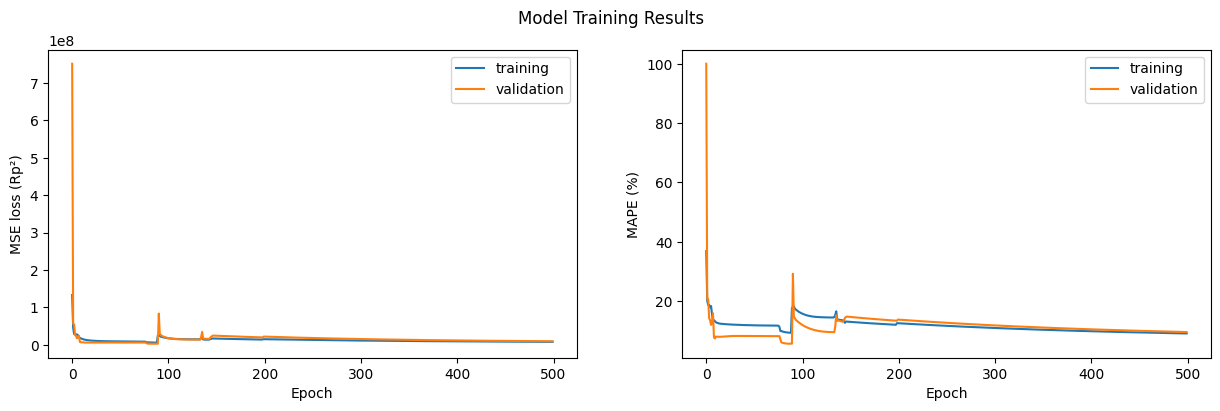

In [23]:
# graph the loss results in the epoch function
fig, ax = plt.subplots(ncols=2, figsize=(15,4))
pd.DataFrame(loss_result).plot(ax=ax[0])
pd.DataFrame(mape_result).plot(ax=ax[1])
ax[0].set_ylabel("MSE loss (Rp\u00b2)")
ax[1].set_ylabel("MAPE (%)")
ax[0].set_xlabel("Epoch")
ax[1].set_xlabel("Epoch")
plt.suptitle(f"Model Training Results")
plt.show()

## 4) *Model Testing*

Pada bagian sebelumnya, model telah dilatih dan dicari konfigurasi terbaiknya. Berikutnya, kita akan melakukan pengujian model pada *testing dataset* dan melakukan perhitungan MAPE.

In [24]:
with torch.inference_mode():
    dtype = torch.float
    x_tensor = torch.tensor(x_test, dtype=dtype)
    y_tensor = torch.tensor(y_test, dtype=dtype)
    pred = lstm(x_tensor)
    mape = mape_score(pred, y_tensor)
    loss = loss_function(pred, y_tensor)
        
print(f"MAPE score : {mape:.2f}%")
print(f"MSE loss   : {loss}")

MAPE score : 7.22%
MSE loss   : 5622507.5


Berikutnya kita akan menyimpan model yang telah di-training tersebut ke dalam direktori.

In [25]:
# save model
path = "model/untr_stock_price_predictor.pt"

model_scripted = torch.jit.script(lstm) # Export to TorchScript
model_scripted.save(path) # Save

Kita juga perlu untuk menyimpan *scaler* untuk kebutuhan *feature scaling*.

In [31]:
# menyimpan scaler
joblib.dump(scaler, 'assets/scaler.pkl')

['assets/scaler.pkl']

# **G. Kesimpulan**

<div style="font-family:Trebuchet MS; font-size:25px; padding-bottom:20px; font-weight:bold">Key Points</div>
<div style="margin-left:2%; width:95%; text-align:justify">

* Saham UNTR tergolong saham siklikal, dimana periode naik-turun terjadi dalam 5 tahun.
* Saham UNTR memiliki tingkat volatilitas pada rentang -4% hingga 4%.
* Model yang dihasilkan hanya mampu memperoleh skor MAPE 9.16, dan angka ini melebih tingkat volatilitas saham UNTR.
* Perlu eksplorasi lebih jauh mengenai arsitektur LSTM atau menggunakan alternatif model lainnya untuk prediksi harga saham agar tujuan proyek ini dapat dicapai.

</div>